### Введение

In [1]:
#Чак Норрис круче Джейсона Стетхема

In [2]:
8 * 6

48

*Мама* **роди** меня ~~обратно~~

Хочу
* Бананы
* Яблоки
* Груши

А что если:
+ Сдавать ДЗ до дедлайна и не терять баллы за просрочку???
+ ...
+ Да не, бред какой то...

![Просто](https://popel-studio.com/images/blog/web-history-2/banana.gif "Баянистый мем")

# 1. Numpy

In [6]:
import numpy as np

### Задача 1

In [31]:
def nonzero_prod(X):
    '''Функция, которая считает произведение ненулевых элементов на диагонали прямоугольной матрицы'''
    x_diag = X.diagonal()
    clear_d = x_diag[x_diag != 0]
    return np.multiply.reduce(clear_d) #http://www.cyberforum.ru/python-beginners/thread1344307.html

In [32]:
### test your code
X = np.arange(20).reshape(4, 5)
X[2, 2] = 0
assert nonzero_prod(X) == 6 * 18
print("OK")

OK


### Задача 2

In [50]:
def max_after_zero(x):
    zero = x==0 #получаем вектор из булевых варажений
    return x[1:][zero[:-1]].max() #накладываем булев вектор на вектор значений

In [51]:
### test your code
x = np.array([0, 1, 2, 0, 6, 0, 10, 0])
assert max_after_zero(x) == 10
print("OK")

OK


* Отсюда http://www.cyberforum.ru/python-beginners/thread1659360.html

### Задача 3

In [64]:
def grayscale(img, weights):
    ### your code here

SyntaxError: unexpected EOF while parsing (<ipython-input-64-323162a26ffd>, line 2)

In [435]:
### test your code
img = np.arange(1*2*3).reshape(1, 2, 3)
weights = np.array([0.299, 0.587, 0.114])
res = np.array([[ 0.815,  3.815]])
assert np.allclose(grayscale(img, weights), res)
print("OK")

NameError: name 'grayscale' is not defined

### Задача 4

In [440]:
def cdist_numpy(X, Y):
    np.linalg.linalg.
    return numpy.linalg.norm(X-Y)

In [468]:
def cdist_python(X, Y):
    snafu = np.zeros(X.shape[0] * Y.shape[0]).reshape(X.shape[0], Y.shape[0])
    for i in range(len(X)):
        for j in range(len(Y)):
            snafu[i,j] = np.sum(np.square(X[i] - Y[j]))
    return np.sqrt(snafu)

In [474]:
X = np.arange(12).reshape(4, 3)
Y = np.arange(1, 16).reshape(-1, 3)
cdist_python(X, Y)

array([[ 1.73205081,  6.92820323, 12.12435565, 17.32050808, 22.5166605 ],
       [ 3.46410162,  1.73205081,  6.92820323, 12.12435565, 17.32050808],
       [ 8.66025404,  3.46410162,  1.73205081,  6.92820323, 12.12435565],
       [13.85640646,  8.66025404,  3.46410162,  1.73205081,  6.92820323]])

In [472]:
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [473]:
Y

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [465]:
np.sum(np.square(X[0]-Y[0]))

3

In [436]:
### test your code
from scipy.spatial.distance import cdist
X = np.arange(12).reshape(4, 3)
Y = np.arange(1, 16).reshape(5, 3)
assert np.allclose(cdist(X, Y), cdist_numpy(X, Y))
assert np.allclose(cdist(X, Y), cdist_python(X, Y))
print("OK")

NameError: name 'cdist_numpy' is not defined

# 2. Pandas

In [66]:
%pylab inline  
# import almost all we need
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


#### Задача 1

In [109]:
rawData = pd.read_csv('data.csv')

In [69]:
rawData.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [85]:
print('Строк:', len(rawData), '\n', 'Столбцы:', rawData.columns.tolist())

Строк: 4622 
 Столбцы: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [84]:
rawData.columns.tolist()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

#### Задача 2

In [91]:
print('Заказов попало в выборку:', rawData.order_id.nunique())
print('Уникальных категорий товара:', rawData.item_name.nunique())

Заказов попало в выборку: 1834
Уникальных категорий товара: 50


#### Задача 3

In [107]:
rawData.isna().any()

order_id              False
quantity              False
item_name             False
choice_description     True
item_price            False
dtype: bool

In [115]:
rawData.choice_description.fillna('', inplace= True)

In [117]:
rawData.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### Задача 4

In [138]:
rawData.item_price.dtype

dtype('O')

In [142]:
rawData['new_price'] = rawData.item_price.apply(lambda x: float(x[1:]))

In [147]:
print('Минимальная цена товара:', rawData.new_price.min())
print('Максимальная цена товара:', rawData.new_price.max())
print('Средняя цена товара:', rawData.new_price.mean())

Минимальная цена товара: 1.09
Максимальная цена товара: 44.25
Средняя цена товара: 7.464335785374397


In [152]:
rawData.drop('item_price', axis= 1, inplace=True)

#### Задача 5

In [154]:
sp_data = rawData.copy()

In [157]:
sp_data['unit_price'] = sp_data['new_price'] / sp_data['quantity']

In [171]:
sp_data[['choice_description', 'unit_price']].sort_values(by=['unit_price'], ascending=False).head(5)

,choice_description,unit_price
2442,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.89
2957,"[Fresh Tomato Salsa, [Black Beans, Cheese, Gua...",11.89
613,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.89
2401,"[Fresh Tomato Salsa, [Fajita Vegetables, Guaca...",11.89
281,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",11.89


In [170]:
sp_data[['choice_description', 'unit_price']].sort_values(by=['unit_price'], ascending=True).head(5)

,choice_description,unit_price
3364,[Coca Cola],1.09
818,,1.09
1182,,1.09
162,[Diet Coke],1.09
821,[Coca Cola],1.09


#### Задача 6

In [195]:
#snafu = rawData[rawData['item_name'] == 'Chicken Bowl'].groupby('item_name').sum()

In [197]:
snafu['quantity']

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [200]:
len(rawData[(rawData['item_name'] == 'Chicken Bowl') & (rawData['quantity'] > 1)])

33

#### Задача 7

In [206]:
b1 = rawData.groupby('order_id').sum()

In [213]:
b1.loc[:, ['new_price']].head(10)

,new_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
6,17.50
7,15.70
8,10.88
9,10.67


In [217]:
print('Средний чек: %f' % b1.new_price.mean())

Средний чек: 18.811429


In [218]:
print('Товаров в среднем покупают: %f' % b1.quantity.mean())

Товаров в среднем покупают: 2.711014


#### Задача 8

In [219]:
b2 = rawData.groupby('order_id').sum()

In [223]:
len(b2[b2['quantity'] ==1])

56

#### Задача 9

In [227]:
b3 = rawData.groupby('item_name').sum()

In [234]:
b3.sort_values('quantity', ascending= False).head(1)

,order_id,quantity,new_price
item_name,,,
Chicken Bowl,713926,761,7342.73


#### Задача 10

In [237]:
def burito(x):
    if "Burrito" in x:
        return x

In [251]:
b4 = rawData[rawData['item_name'].str.contains("Burrito")]

In [254]:
b4.groupby('item_name').sum()

,order_id,quantity,new_price
item_name,,,
Barbacoa Burrito,74718,91,894.75
Burrito,1550,6,44.40
Carnitas Burrito,51652,60,597.83
Chicken Burrito,497303,591,5575.82
Steak Burrito,328437,386,3851.43
Veggie Burrito,80962,97,934.77


In [256]:
#Всего видов 
len(b4.groupby('item_name').sum())

6

In [262]:
b4['avg_price'] = b4['new_price'] / b4['quantity']

C:\Users\Lex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [265]:
b4.sort_values('avg_price', ascending= False).head(1)

,order_id,quantity,item_name,choice_description,new_price,avg_price
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75


#### Задача 11

In [267]:
b5 = rawData.groupby('order_id').sum()

In [272]:
b5

,quantity,new_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
6,2,17.50
7,2,15.70
8,2,10.88
9,3,10.67


#### Задача 12

In [274]:
rawData['avg_price'] = rawData['new_price'] / rawData['quantity']

In [291]:
b6 = rawData[rawData['choice_description'].str.contains("Diet Coke")]
b6.head(10)

,order_id,quantity,item_name,choice_description,new_price,avg_price
162,73,2,Canned Soda,[Diet Coke],2.18,1.09
200,89,1,Canned Soda,[Diet Coke],1.09,1.09
317,138,1,Canned Soda,[Diet Coke],1.09,1.09
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
350,150,2,Canned Soda,[Diet Coke],2.18,1.09
368,159,1,Canned Soft Drink,[Diet Coke],1.25,1.25
370,160,1,Canned Soda,[Diet Coke],1.09,1.09
388,168,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
417,182,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
492,206,2,Canned Soft Drink,[Diet Coke],2.50,1.25


In [297]:
b6 = b6[b6['avg_price'] == 1.25]
err = b6['new_price'].sum() #столько должно было быть в случае ошибки
err

143.75

In [302]:
b6['avg_price'] = 1.35
b6['new_price'] = b6['avg_price'] * b6['quantity']
real = b6['new_price'].sum() #столько должно было быть в случае ошибки

In [305]:
#На столько процентов больше денег с этого товара должно быть заработано:
round((real - err) / err, 2) * 100

8.0

#### Задача 13

In [307]:
data = np.random.rand(10, 3)
data

array([[0.63242366, 0.49105803, 0.93219602],
       [0.86243255, 0.576901  , 0.65243121],
       [0.34997458, 0.53508379, 0.46243321],
       [0.28435609, 0.29990385, 0.88833648],
       [0.42553126, 0.17208701, 0.82792097],
       [0.50379641, 0.67631799, 0.29573827],
       [0.40925102, 0.15066065, 0.40835473],
       [0.57496235, 0.91461532, 0.40671909],
       [0.70313242, 0.66453678, 0.726996  ],
       [0.14734688, 0.82176208, 0.46492389]])

In [308]:
data1 = pd.DataFrame(data, columns= ['index', 'column1', 'column2'])

In [312]:
data1.set_index('index')

,column1,column2
index,,
0.632424,0.491058,0.932196
0.862433,0.576901,0.652431
0.349975,0.535084,0.462433
0.284356,0.299904,0.888336
0.425531,0.172087,0.827921
0.503796,0.676318,0.295738
0.409251,0.150661,0.408355
0.574962,0.914615,0.406719
0.703132,0.664537,0.726996


In [321]:
data1.to_csv('foobar.csv', index=False)

# 3. Matplotlib

In [315]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [327]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

In [330]:
dates = pd.DataFrame(index=rawData.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d') #компонент случайности
    for _ in range(rawData.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
rawData['date'] = rawData.order_id.map(dates['date'])

In [392]:
rawData.head(5)

,order_id,quantity,item_name,choice_description,new_price,avg_price,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39,2018-01-20
1,1,1,Izze,[Clementine],3.39,3.39,2018-01-20
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,2018-01-20
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39,2018-01-20
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,2018-01-24


In [404]:
start
today = datetime.datetime(2017, 10, 16)
today.weekday()

0

### Задача 1

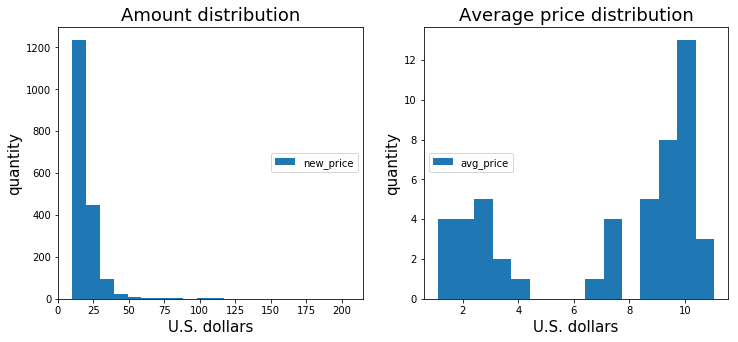

In [434]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))
graphRep = plt.figure(figsize=(12, 5))
ax1 = graphRep.add_subplot(1, 2, 1)
ax2 = graphRep.add_subplot(1, 2, 2)
c1 = rawData.groupby('order_id').sum()
#c1['new_price'].hist(bars = 30)
#c1['new_price'].plot(grid = True, rot = 0, ax = ax1, kind = "hist", fontsize = 12)
#c1.new_price.hist(bins = 1000)
ax1.hist(c1.new_price, bins = 20)
ax1.set_ylabel("quantity", fontsize = 15)
ax1.set_xlabel("U.S. dollars", fontsize = 15)
ax1.set_title("Amount distribution", fontsize = 18)
ax1.legend(loc= "center right", fontsize = 10)

c11 = rawData.groupby('item_name').mean()
ax2.hist(c11.avg_price, bins = 15)
ax2.set_ylabel("quantity", fontsize = 15)
ax2.set_xlabel("U.S. dollars", fontsize = 15)
ax2.set_title("Average price distribution", fontsize = 18)
ax2.legend(loc= "center left", fontsize = 10)

In [374]:
c1.sort_values('new_price', ascending=False).head(5)
#rawData[rawData['order_id'] == 926]

,quantity,new_price,avg_price
order_id,,,
926,23,205.25,205.25
1443,35,160.74,41.69
1483,14,139.00,139.00
691,11,118.25,118.25
1786,20,114.30,93.45


### Задача 2

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

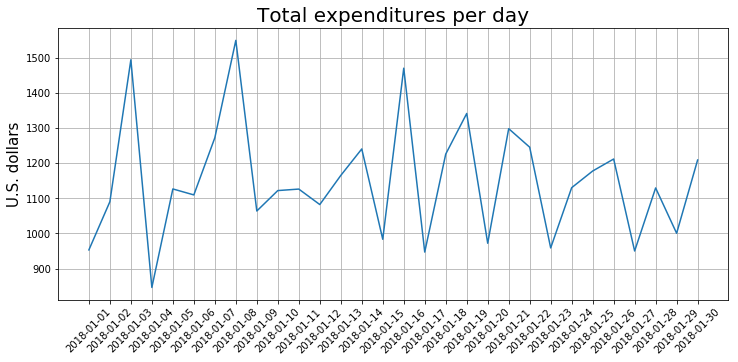

In [389]:
graphRep = plt.figure(figsize=(12, 5))
ax1 = graphRep.add_subplot(1, 1, 1)
c2 = rawData.groupby('date').sum()
ax1.plot(c2['new_price'])
ax1.grid(True)
ax1.set_ylabel("U.S. dollars", fontsize = 15)
ax1.set_title("Total expenditures per day", fontsize = 20)
plt.xticks(rotation=45)
#ax1.legend(loc= "center right", fontsize = 10)

### Задача 3

Text(0.5,1,'Avg expenditures per weekday')

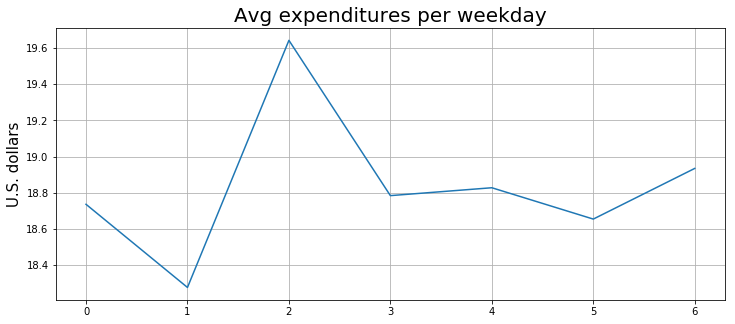

In [428]:
def getmfday(x):
    x = datetime.date(int(x.split('-')[0]),int(x.split('-')[1]),int(x.split('-')[2]))
    return x.weekday()
rawData['day_of_week'] = rawData.date.apply(getmfday)
c3 = rawData.groupby(['day_of_week', 'order_id']).sum()
c33 = c3.groupby(['day_of_week']).mean()
graphRep = plt.figure(figsize=(12, 5))
ax1 = graphRep.add_subplot(1, 1, 1)
ax1.plot(c33['new_price'])
ax1.grid(True)
ax1.set_ylabel("U.S. dollars", fontsize = 15)
ax1.set_title("Avg expenditures per weekday", fontsize = 20)
#plt.xticks(rotation=45)

### Задача 4

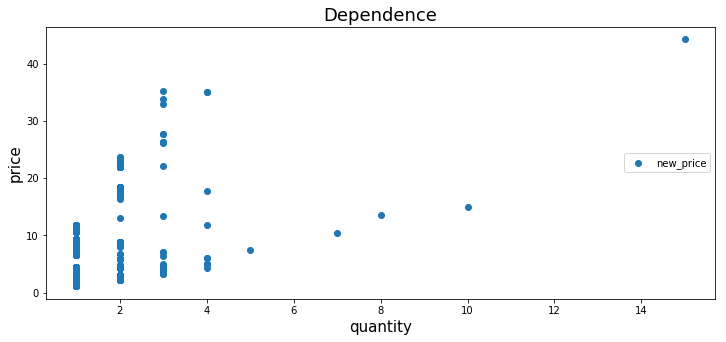

In [433]:
graphRep = plt.figure(figsize=(12, 5))
ax1 = graphRep.add_subplot(1, 1, 1)
ax1.scatter(rawData['quantity'], rawData['new_price'])
ax1.set_ylabel("price", fontsize = 15)
ax1.set_xlabel("quantity", fontsize = 15)
ax1.set_title("Dependence", fontsize = 18)
ax1.legend(loc= "center right", fontsize = 10)

In [431]:
graphRep.savefig("FooBar.pdf")